<a href="https://colab.research.google.com/github/eversonmariano/Notebooks-Colab/blob/main/Grafo_(Everson).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Vertices

In [ ]:
class Vertice:

  def __init__(self, rotulo, distancia_objetivo):
    self.rotulo = rotulo
    self.visitado = False
    self.distancia_objetivo = distancia_objetivo
    self.adjacentes = []

  #Faz as ligaçoes dos vertices
  def adiciona_adjacente(self, adjacente):
    self.adjacentes.append(adjacente)

  def mostra_adjacentes(self):
    for i in self.adjacentes:
      print(i.vertice.rotulo, i.custo)

In [ ]:
#Representa a ligaçao dos vertices(uma cidade a outra)
class Adjacente:
  def __init__(self, vertice, custo):
    self.vertice = vertice
    self.custo = custo

##grafo - ARAD ATÉ BUCARESTE

In [ ]:
class Grafo:
  arad = Vertice('Arad', 366) #(rotulo, distancia em linha reta Arad a Bucareste)
  zerind = Vertice('Zerind', 374)
  oradea = Vertice('Oradea', 380)
  sibiu = Vertice('Sibiu', 253)
  timisoara = Vertice('Timisoara', 329)
  lugoj = Vertice('Lugoj', 244)
  mehadia = Vertice('Mehadia', 241)
  dobreta = Vertice('Dobreta', 242)
  craiova = Vertice('Craiova', 160)
  rimnicu = Vertice('Rimnicu', 193)
  fagaras = Vertice('Fagaras', 178)
  pitesti = Vertice('Pitesti', 98)
  bucharest = Vertice('Bucharest', 0)
  giurgiu = Vertice('Giurgiu', 77)

  arad.adiciona_adjacente(Adjacente(zerind, 75))
  arad.adiciona_adjacente(Adjacente(sibiu, 140))
  arad.adiciona_adjacente(Adjacente(timisoara, 118))

  zerind.adiciona_adjacente(Adjacente(arad, 75))
  zerind.adiciona_adjacente(Adjacente(oradea, 71))

  oradea.adiciona_adjacente(Adjacente(zerind, 71))
  oradea.adiciona_adjacente(Adjacente(sibiu, 151))

  sibiu.adiciona_adjacente(Adjacente(oradea, 151))
  sibiu.adiciona_adjacente(Adjacente(arad, 140))
  sibiu.adiciona_adjacente(Adjacente(fagaras, 99))
  sibiu.adiciona_adjacente(Adjacente(rimnicu, 80))

  timisoara.adiciona_adjacente(Adjacente(arad, 118))
  timisoara.adiciona_adjacente(Adjacente(lugoj, 111))

  lugoj.adiciona_adjacente(Adjacente(timisoara, 111))
  lugoj.adiciona_adjacente(Adjacente(mehadia, 70))

  mehadia.adiciona_adjacente(Adjacente(lugoj, 70))
  mehadia.adiciona_adjacente(Adjacente(dobreta, 75))

  dobreta.adiciona_adjacente(Adjacente(mehadia, 75))
  dobreta.adiciona_adjacente(Adjacente(craiova, 120))

  craiova.adiciona_adjacente(Adjacente(dobreta, 120))
  craiova.adiciona_adjacente(Adjacente(pitesti, 138))
  craiova.adiciona_adjacente(Adjacente(rimnicu, 146))

  rimnicu.adiciona_adjacente(Adjacente(craiova, 146))
  rimnicu.adiciona_adjacente(Adjacente(sibiu, 80))
  rimnicu.adiciona_adjacente(Adjacente(pitesti, 97))

  fagaras.adiciona_adjacente(Adjacente(sibiu, 99))
  fagaras.adiciona_adjacente(Adjacente(bucharest, 211))

  pitesti.adiciona_adjacente(Adjacente(rimnicu, 97))
  pitesti.adiciona_adjacente(Adjacente(craiova, 138))
  pitesti.adiciona_adjacente(Adjacente(bucharest, 101))

  bucharest.adiciona_adjacente(Adjacente(fagaras, 211))
  bucharest.adiciona_adjacente(Adjacente(pitesti, 101))
  bucharest.adiciona_adjacente(Adjacente(giurgiu, 90))


In [ ]:
grafo = Grafo()

In [ ]:
grafo.arad.mostra_adjacentes()

Zerind 75
Sibiu 140
Timisoara 118


## Vetor Ordenado


esses algoritmos mais avançadas se utilizam de outras estruturas de dados. Por exemplo:
- A Busca em Profundidade utiliza uma Pilha;
- A Busca em Largura utiliza um Fila;
- E a Busca Gulosa utiliza um vetor ordenado.  

In [ ]:
import numpy as np
class VetorOrdenado:
  
  def __init__(self, capacidade):
    self.capacidade = capacidade
    self.ultima_posicao = -1
    # Mudança no tipo de dados
    self.valores = np.empty(self.capacidade, dtype=object)

  # Referência para o vértice e comparação com a distância para o objetivo
  def insere(self, vertice):
    if self.ultima_posicao == self.capacidade - 1:
      print('Capacidade máxima atingida')
      return
    posicao = 0
    for i in range(self.ultima_posicao + 1):
      posicao = i
      if self.valores[i].distancia_objetivo > vertice.distancia_objetivo:
        break
      if i == self.ultima_posicao:
        posicao = i + 1
    x = self.ultima_posicao
    while x >= posicao:
      self.valores[x + 1] = self.valores[x]
      x -= 1
    self.valores[posicao] = vertice
    self.ultima_posicao += 1

  def imprime(self):
    if self.ultima_posicao == -1:
      print('O vetor está vazio')
    else:
      for i in range(self.ultima_posicao + 1):
        print(i, ' - ', self.valores[i].rotulo, ' - ', self.valores[i].distancia_objetivo)  

In [ ]:
vetor = VetorOrdenado(5)
vetor.insere(grafo.arad)
vetor.insere(grafo.craiova)
vetor.insere(grafo.bucharest)
vetor.insere(grafo.dobreta)

In [ ]:
vetor.imprime()

0  -  Bucharest  -  0
1  -  Craiova  -  160
2  -  Dobreta  -  242
3  -  Arad  -  366


In [ ]:
vetor.valores[0], vetor.valores[0].rotulo

(<__main__.Vertice at 0x7f6d4fc6cc90>, 'Bucharest')

##Busca Gulosa  

In [ ]:
class Gulosa:
  def __init__(self, objetivo):
    self.objetivo = objetivo
    self.econtrado = False

  def buscar(self, atual):
    print('-------')
    print('Atual: {}'.format(atual.rotulo))
    atual.visitado = True

    if atual == self.objetivo:
      self.encontrado = True
    else:
      vetor_ordenado = VetorOrdenado(len(atual.adjacentes))
      for adjacente in atual.adjacentes:
        if adjacente.vertice.visitado == False:
          adjacente.vertice.visitado == True
          vetor_ordenado.insere(adjacente.vertice)
      vetor_ordenado.imprime()

      if vetor_ordenado.valores[0] != None:
        self.buscar(vetor_ordenado.valores[0])

In [ ]:
busca_gulosa = Gulosa(grafo.bucharest)
busca_gulosa.buscar(grafo.arad)

-------
Atual: Arad
0  -  Sibiu  -  253
1  -  Timisoara  -  329
2  -  Zerind  -  374
-------
Atual: Sibiu
0  -  Fagaras  -  178
1  -  Rimnicu  -  193
2  -  Oradea  -  380
-------
Atual: Fagaras
0  -  Bucharest  -  0
-------
Atual: Bucharest


Caminho em linha reta abaixo:

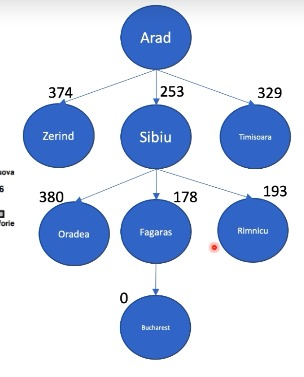